In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import warnings
warnings.filterwarnings('ignore')

c:\Users\Dell\Desktop\TSA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv('data/MaunaLoaDailyTemps-1.csv')
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [3]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 99.6+ KB


In [4]:
df=df[['DATE','AvgTemp']]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [5]:
df.columns=['ds','y']
df.head()

,ds,y
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [6]:
df['ds']=pd.to_datetime(df['ds'])

<Axes: xlabel='ds'>

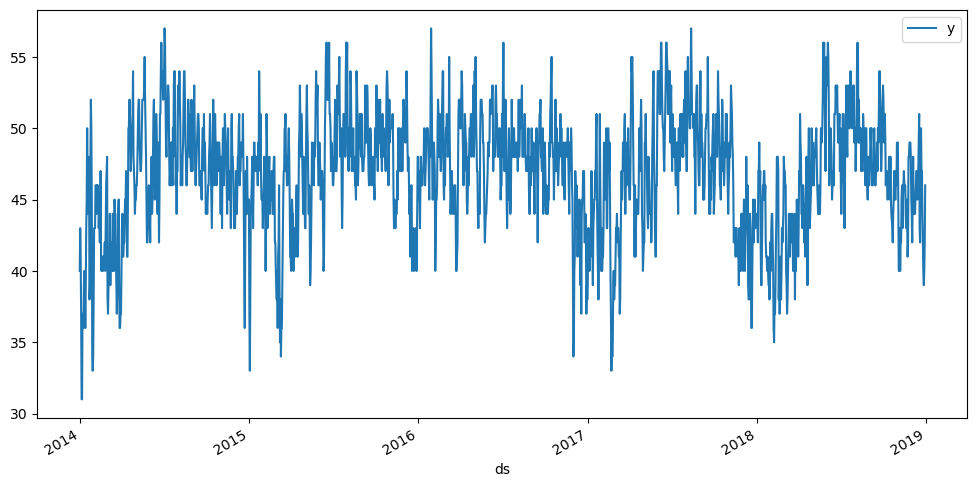

In [7]:
df.plot(figsize=(12,6),x='ds',y='y')

In [8]:
train=df.iloc[:-365]
test=df.iloc[-365:]

In [9]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast.tail()

19:28:33 - cmdstanpy - INFO - Chain [1] start processing
19:28:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.213661,36.802686,45.872137,44.623559,47.811804,-4.954518,-4.954518,-4.954518,-0.145803,-0.145803,-0.145803,-4.808715,-4.808715,-4.808715,0.0,0.0,0.0,41.259143
1817,2018-12-26,46.212951,36.638450,45.738052,44.613354,47.821536,-4.909944,-4.909944,-4.909944,-0.052627,-0.052627,-0.052627,-4.857318,-4.857318,-4.857318,0.0,0.0,0.0,41.303007
1818,2018-12-27,46.212241,36.957322,46.285010,44.610328,47.829915,-4.779080,-4.779080,-4.779080,0.098653,0.098653,0.098653,-4.877733,-4.877733,-4.877733,0.0,0.0,0.0,41.433161
1819,2018-12-28,46.211531,37.305246,46.619987,44.601879,47.834318,-4.442632,-4.442632,-4.442632,0.426931,0.426931,0.426931,-4.869563,-4.869563,-4.869563,0.0,0.0,0.0,41.768899
1820,2018-12-29,46.210821,36.596432,45.487479,44.588316,47.836353,-4.838710,-4.838710,-4.838710,-0.005809,-0.005809,-0.005809,-4.832900,-4.832900,-4.832900,0.0,0.0,0.0,41.372111


In [10]:
plot_plotly(m,forecast)

In [11]:
plot_components_plotly(m,forecast)